# PCA runthrough
#### by Alvin Zhang
##### Notes and examples based on Bishop's "Pattern Recognition and Machine Learning"

## Standard PCA

PCA can be formulated in two ways: by maximum variance, and by minimum error. Both results give rise to the same solution.

### Maximum variance

Suppose we have a dataset of observations $\{\vec{x}_n\}$ for $n=1,...,N$ and $\vec{x}_n$ has dimensionality $D$, and suppose we wish to project this dataset down to a space with dimensionality $M<D$ by maximizing the variance of the projected data. First consider the base case $M=1$. This means we have a unit vector $\vec{u}_1$ so that $\vec{x}_n$ projects to $\vec{u}_1^T\vec{x}_n$. <br>
It follows that the mean of the projected data is
$$\vec{u}_1^T\bar{\vec{x}}$$
where $\bar{\vec{x}} = \frac{1}{N}\sum_{n=1}^N\vec{x}_n$. <br>
The variance of the projected data is
$$\frac{1}{N}\sum_{n=1}^N(\vec{u}_1^T\vec{x}_n-\vec{u}_1^T\bar{\vec{x}})^2=\vec{u}_1^T\mathbf{S}\vec{u}_1$$
where $\mathbf{S}=\frac{1}{N}\sum_{n=1}^N(\vec{x}_n-\bar{\vec{x}})(\vec{x}_n-\bar{\vec{x}})^T$.
The goal is to maximize the variance of the projected data w.r.t. $\vec{u}_1$ with the constraint that $\vec{u}_1$ is a unit vector. We introduce a Lagrange multiplier $\lambda_1$ so that the Lagrangian is
$$\vec{u}_1^T\mathbf{S}\vec{u}_1+\lambda_1(1-\vec{u}_1^T\vec{u}_1)$$
Finding the critical point w.r.t. $\vec{u}_1$ leads to
$$\mathbf{S}\vec{u}_1=\lambda_1\vec{u}_1\Rightarrow\vec{u}_1\text{ is an eigenvector of }\mathbf{S}$$
$$\Rightarrow\vec{u}_1^T\mathbf{S}\vec{u}_1=\lambda_1\Rightarrow\text{Maximized when }\vec{u}_1 \text{ is set to the eigenvector having the largest eigenvalue }\lambda_1$$
For $M>1$, we can inductively add new components such that the next principal component is an eigenvector orthogonal to the first $M-1$ eigenvector with the largest eigenvalue.

### Minimum error

Suppose again we have a dataset of observations $\{\vec{x}_n\}$ for $n=1,...,N$ and $\vec{x}_n$ has dimensionality $D$. We introduce a complete orthonormal set of $D$-dimensional basis vectors $\{\vec{u}_i\}$ for $i=1,...,D$. <br>
Each data point can be represented by a linear combination of basis vectors since the basis is complete:
$$\vec{x}_n=\sum_{i=1}^D\alpha_{ni}\vec{u}_i$$
This corresponds to a rotation of the coordinate system defined by $\{\vec{u}_i\}$. <br>
Note that
$$\vec{x}_n\cdot\vec{u}_j=\sum_{i=1}^D\alpha_{ni}(\vec{u}_i\cdot\vec{u}_j)=\sum_{i=1}^{j-1}\alpha_{ni}(\vec{u}_i\cdot\vec{u}_j)+\sum_{i=j+1}^D\alpha_{ni}(\vec{u}_i\cdot\vec{u}_j)+\alpha_{nj}(\vec{u}_j\cdot\vec{u}_j)$$
$$\Rightarrow\alpha_{nj}=\vec{x}_n\cdot\vec{u}_j=\vec{x}_n^T\vec{u}_j$$
Back-substituting this into the data point representation, we get
$$\vec{x}_n=\sum_{i=1}^D(\vec{x}_N^T\vec{u}_i)\vec{u}_i$$
Our goal is to approximate this data point using $M<D$ variables so that
$$\tilde{\vec{x}_n}=\sum_{i=1}^Mz_{ni}\vec{u}_i+\sum_{i=M+1}^Db_i\vec{u}_i$$
where $\{z_{ni}\}$ depend on each data point and $\{b_i\}$ are constants for all data points. <br>
The cost function is then 
$$J=\frac{1}{N}\sum_{n=1}^N\Vert\vec{x}_n-\tilde{\vec{x}}_n\Vert^2$$
Finding the critical point w.r.t. $\{z_{ni}\}$, we get $z_{nj}=\vec{x}_n^T\vec{u}_j$ for $j=1,...,M$. <br>
Finding the critical point w.r.t. $\{b_i\}$, we get $b_j=\bar{\vec{x}}^T\vec{u}_j$ for $j=M+1,...,D$. <br>
Substituting these values in and using $\vec{x}_n=\sum_{i=1}^D(\vec{x}_N^T\vec{u}_i)\vec{u}_i$, we get
$$\vec{x}_n-\tilde{\vec{x}_n}=\sum_{i=M+1}^D\{(\vec{x}_n-\bar{\vec{x}})^T\vec{u}_i\}\vec{u}_i$$
Substituting this into $J$, we get
$$J=\frac{1}{N}=\sum_{n=1}^N\sum_{i=M+1}^D(\vec{x}_n^T\vec{u}_i-\bar{\vec{x}}^T\vec{u}_i)^2=\sum_{i=M+1}^D\vec{u}_i^T\mathbf{S}\vec{u}_i$$
where $\mathbf{S}$ is the data covariance as given above. With similar reasoning as above, in this case we choose the components from $M+1,...,D$ to be the eigenvectors with the smallest eigenvalues in order to minimize $J$. This leaves the principal components $1,...,M$ to be the eigenvectors with the largest eigenvalues.

## Applications

### Dimensionality reduction

We're going to reduce 2D data to 1D data for easy visualization, but normally we work with much higher dimensional datasets. <br> Suppose we have the following data:

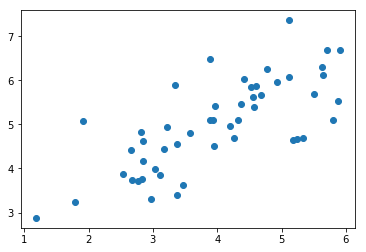

In [1]:
import numpy as np
from matplotlib import pyplot as plt

file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set7X.csv'
X = np.loadtxt(file_name_X, delimiter=',')
plt.plot(X[:, [0]], X[:, [1]], 'o')
plt.show()

The PCA object is defined as follows:

In [2]:
class PCA:
    def __init__(self, X):
        """
        Initializes PCA object.
        Args:
            X (float ndarray): dataset
        """
        self.X = X
        self.N, self.D = self.X.shape[0], self.X.shape[1]
        self.mean = np.average(self.X, axis=0).reshape(-1, 1)
        self.cov = (self.X - self.mean.T).T.dot(self.X - self.mean.T) / self.N
        self.eiglist = None
        self.M = None
        self.W = None

    def fit(self):
        """
        Computes components for model.
        Returns:
            eiglist (tuple list): list of (eigenvalue, eigenvector) in descending order
        """
        evals, evecs = np.linalg.eig(self.cov)
        self.eiglist = [(evals[i], evecs[:, i]) for i in range(len(evals))]
        self.eiglist.sort(key=lambda x: x[0], reverse=True)
        return self.eiglist

    def transform(self, M):
        """
        Computes components for model.
        Args:
            M (int): number of dimensions to project to
        Returns:
            reduced (ndarray): input reduced down to M dimensions
            projs (ndarray): `reduced` projected back to D-dimensional space
        """
        assert self.eiglist is not None, 'Need to fit first.'
        self.M = M
        self.W = np.zeros((self.D, self.M))
        for i in range(M):
            self.W[:, [i]] = self.eiglist[i][1].reshape(-1, 1)
        reduced = self.X.dot(self.W) - self.mean.T.dot(self.W)
        projs = pca.mean.T + reduced.dot(self.W.T)
        return reduced, projs

The components are plotted below:

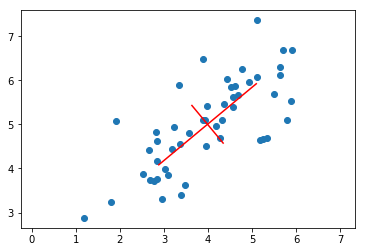

In [3]:
def plot_pca_2D(fig, X, eiglist):
    """
    Plots PCA data.
    Args:
        fig (figure): figure to plot on
        X (float ndarray): x values to plot
        eiglist (tuple list): list of (eigenvalue, eigenvector) in descending order
    """
    eval1, eval2 = eiglist[0][0], eiglist[1][0]
    evec1, evec2 = eiglist[0][1], eiglist[1][1]
    mean = np.average(X, axis=0)
    plt.axis('equal')
    plt.plot(X[:, [0]], X[:, [1]], 'o')
    eig1_plt = np.vstack([mean - eval1**0.5 * evec1, mean + eval1**0.5 * evec1])
    eig2_plt = np.vstack([mean - eval2**0.5 * evec2, mean + eval2**0.5 * evec2])
    plt.plot(eig1_plt[:, [0]], eig1_plt[:, [1]], 'r')
    plt.plot(eig2_plt[:, [0]], eig2_plt[:, [1]], 'r')

pca = PCA(X)
eiglist = pca.fit()

# Plot points and eigenvectors
plot_pca_2D(plt, X, eiglist)
plt.show()

The reduced dataset and projected dataset are plotted respectively:

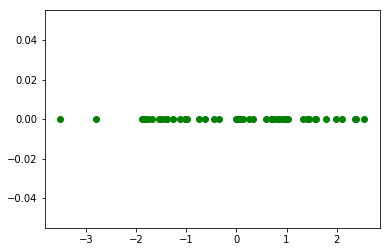

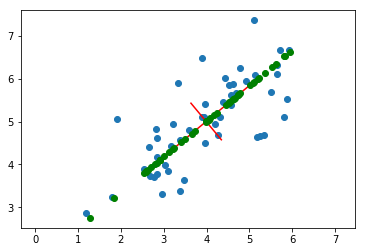

In [4]:
M = 1
reduced, projs = pca.transform(M)

plt.plot(reduced, np.zeros(reduced.shape), 'go')
plt.show()

plot_pca_2D(plt, X, eiglist)
plt.plot(projs[:, [0]], projs[:, [1]], 'go')
plt.show()

### Data visualization

Suppose we have the following 3D dataset obtained from K-means clustering on an image. We'd like to visualize the colors in 2D space instead of 3D RGB space.

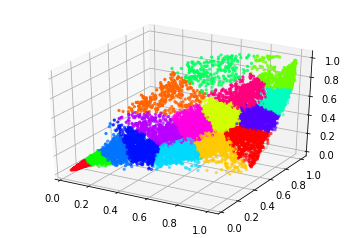

In [5]:
from mpl_toolkits.mplot3d import Axes3D

file_name_X = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set8X.csv'
file_name_t = 'C:\\Users\\Alvin\\Google Drive\\CS\\ML-DL\\Examples\\data\\set8t.csv'
X = np.loadtxt(file_name_X, delimiter=',')
t = np.loadtxt(file_name_t, delimiter=',').astype(np.int32)

color_map = plt.cm.get_cmap('hsv', len(np.unique(t)))
colors = [color_map(i) for i in t]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,[0]], X[:,[1]], X[:,[2]], c=colors, marker='.')
plt.show()

Here is the data reduced down to 2 dimensions for better visualization. This is the rotation with the view that best maximizes the spread of the data.

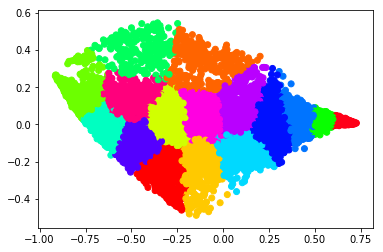

In [6]:
pca = PCA(X)
pca.fit()
M = 2
reduced, projs = pca.transform(M)

plt.scatter(reduced[:,[0]], reduced[:,[1]], c=colors)
plt.show()

TODO:
    Probabilistic PCA: Formulation and Bayesian PCA
    Applications of PCA: Whitening data
    Kernel PCA